In [10]:
import pandas as pd
# 1
items = pd.read_csv('Items.csv')
average_price = items['item_price'].mean()
print(f"Average item price: {average_price}")
# 2
order_item = pd.read_csv('order_item.csv')
most_purchasing_customer = order_item.groupby('order_id')['quantity'].sum().idxmax()
print(f"Customer who purchased the most products: {most_purchasing_customer}")
# 3
order_item = order_item.merge(items[['id', 'item_price']], left_on='item_id', right_on='id', suffixes=('', '_item'))
order_item['total_price'] = order_item['quantity'] * order_item['item_price']
print(order_item[['order_id', 'item_id', 'quantity', 'item_price', 'total_price']].head())
# 4
orders = pd.read_csv('orders.csv')
orders = orders.merge(order_item[['order_id', 'total_price']].groupby('order_id').sum(), on='order_id')
print(orders[['order_id', 'customer_id', 'total_price']].head())
# 5
max_purchase = orders['total_price'].max()
min_purchase = orders['total_price'].min()
average_purchase = orders['total_price'].mean()
print(f"Max purchase: {max_purchase}, Min purchase: {min_purchase}, Average purchase: {average_purchase}")
# 6
table_customers = pd.read_csv('customers.csv')
pivot_table = pd.pivot_table(
    table_customers,
    index='nationallity',
    columns='gender',
    aggfunc='size',
    fill_value=0
)
print(pivot_table)
results = pd.DataFrame({
    'Metric': ['Max Purchase', 'Min Purchase', 'Average Purchase'],
    'Value': [max_purchase, min_purchase, average_purchase]
})
print("\nPurchase Metrics:\n", results)

Average item price: 2222.0825999999997
Customer who purchased the most products: 335
   order_id  item_id  quantity  item_price  total_price
0       337     10.0         2      453.85       907.70
1       430     27.0         6     1283.99      7703.94
2       430     36.0         2     3256.88      6513.76
3       508     46.0         1     1606.65      1606.65
4       229     27.0         2     1283.99      2567.98
   order_id  customer_id  total_price
0         1        477.0      8554.20
1         2         93.0     10148.58
2         3        474.0      6843.36
3         4        333.0       965.20
4         5        436.0     63944.94
Max purchase: 81267.68, Min purchase: 241.54, Average purchase: 14814.50639908257
gender         Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
nationallity                                                               
Argentina            1         0      10            1            0     9   
Brazil               0         0       6 

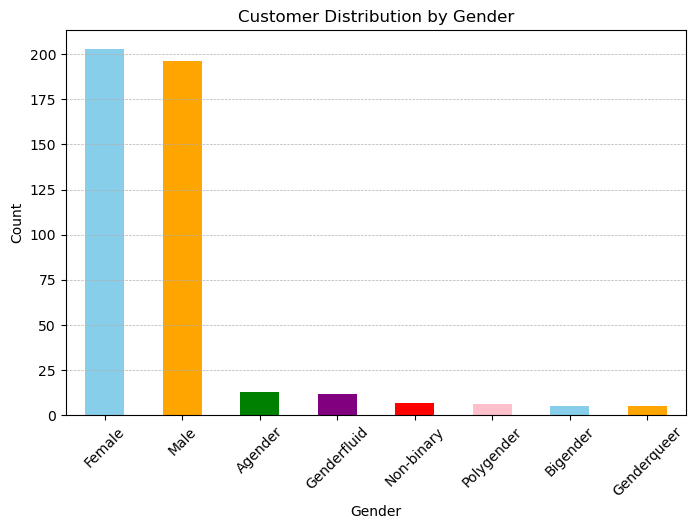

In [14]:
# 1
import matplotlib.pyplot as plt
customers = pd.read_csv('customers.csv')
gender_distribution = customers['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple', 'red', 'pink'])
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

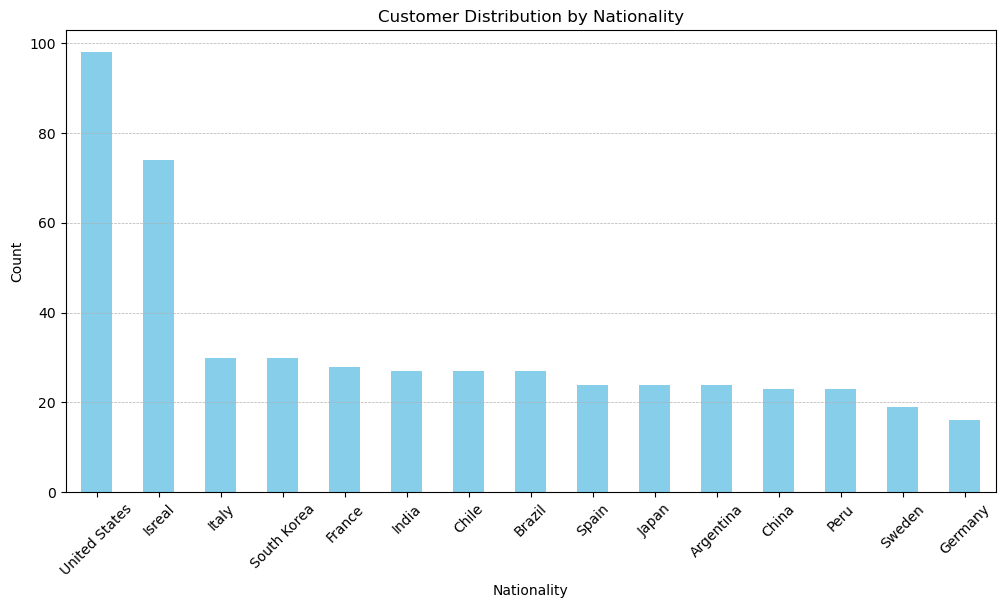

In [16]:
# 2
nationality_distribution = customers['nationallity'].value_counts()
plt.figure(figsize=(12, 6))
nationality_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


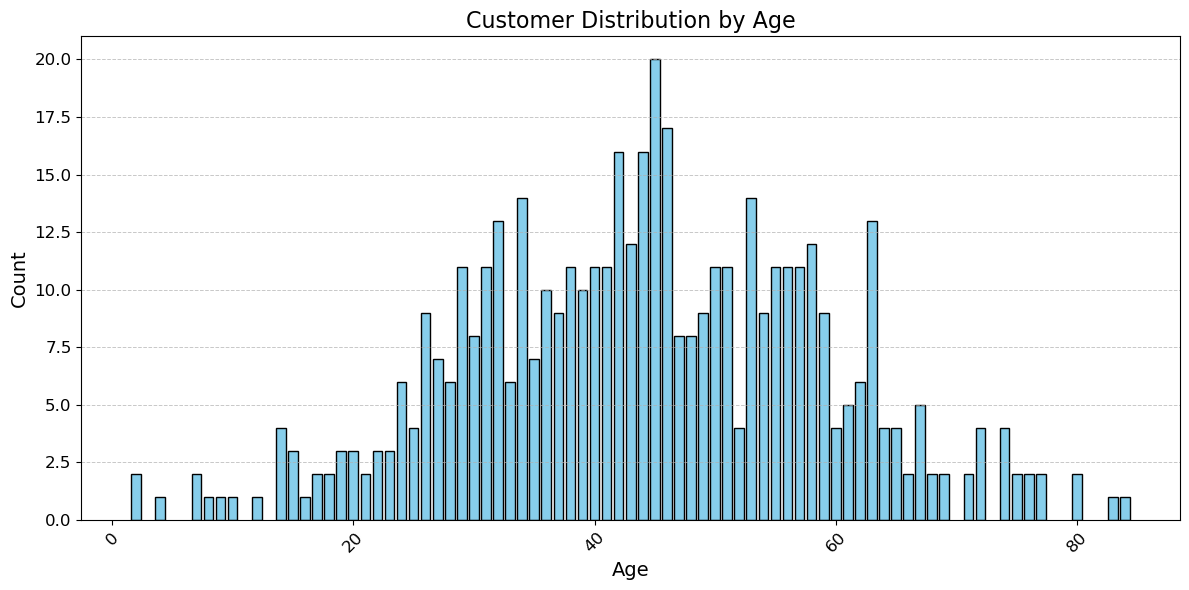

In [20]:
# 3
age_distribution = customers['age'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(age_distribution.index, age_distribution.values, color='skyblue', edgecolor='black')
plt.title('Customer Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

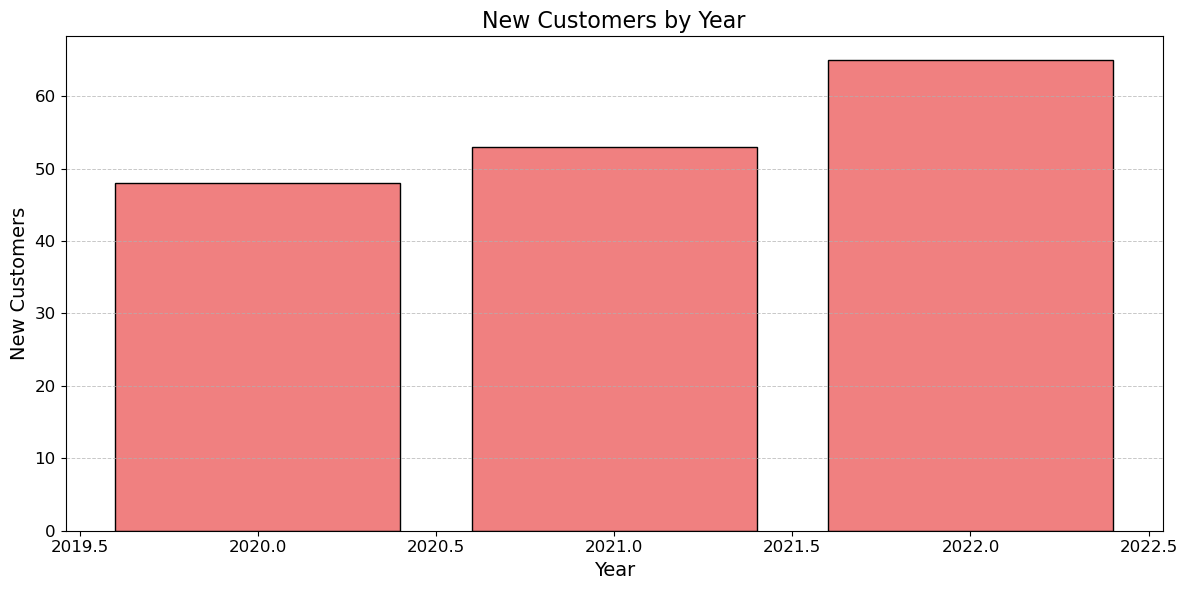

In [22]:
# 4
customers['joining_date'] = pd.to_datetime(customers['joining_date'], errors='coerce')
yearly_new_customers = customers['joining_date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(yearly_new_customers.index, yearly_new_customers.values, color='lightcoral', edgecolor='black')
plt.title('New Customers by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('New Customers', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

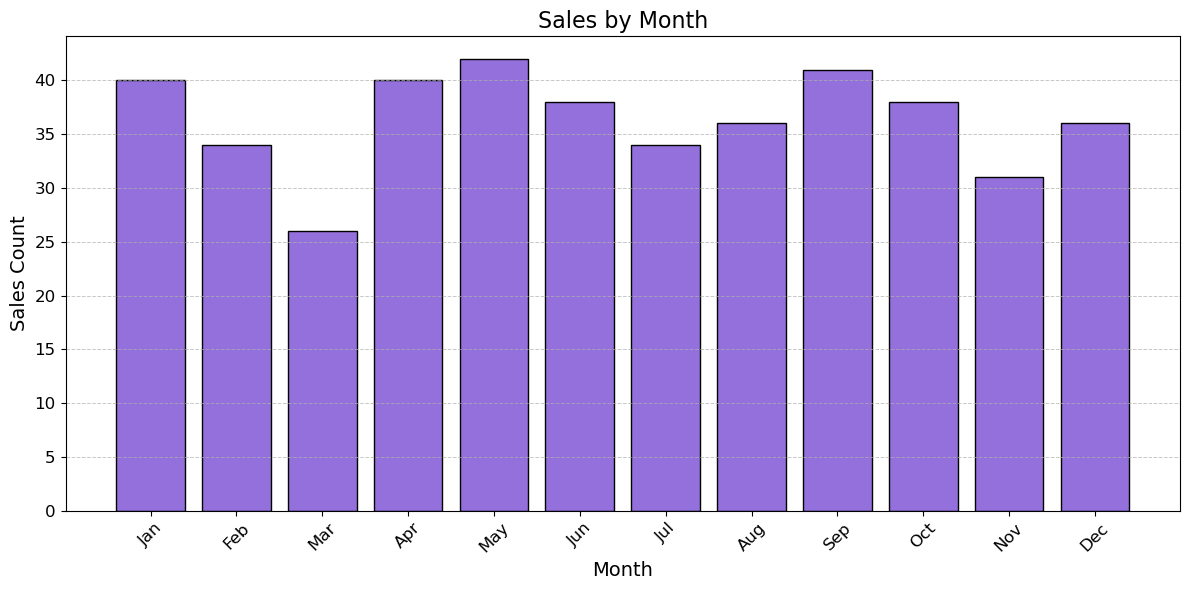

In [24]:
# 5
orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
monthly_sales = orders['order_date'].dt.month.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='mediumpurple', edgecolor='black')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

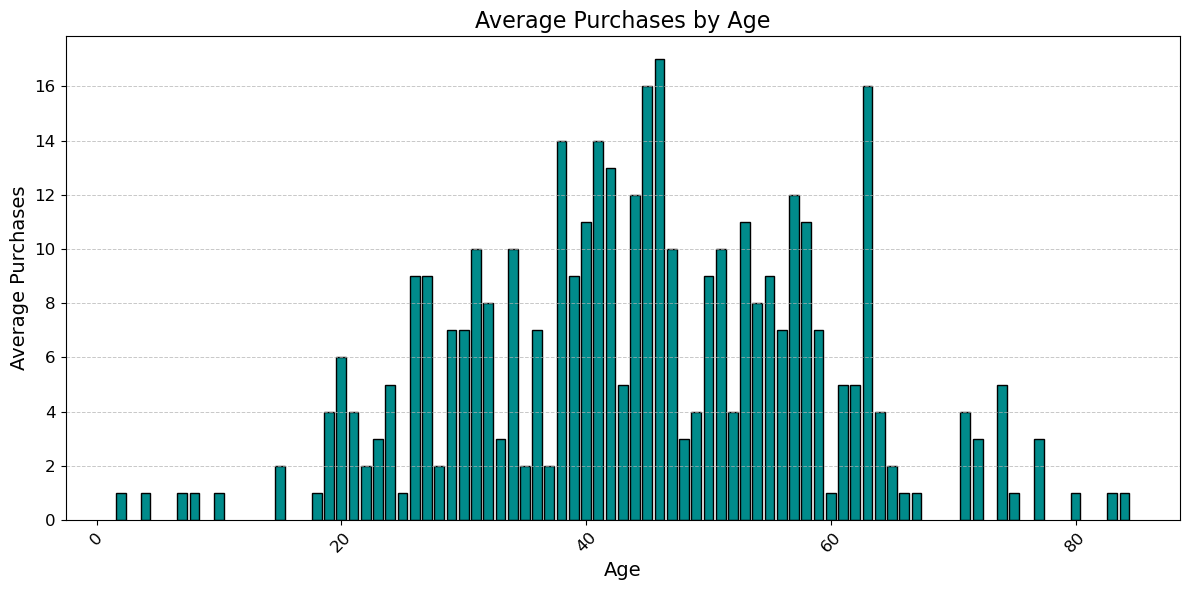

In [26]:
# 6
orders_with_customers = pd.merge(orders, customers, left_on='customer_id', right_on='id', how='inner')
age_purchase_avg = orders_with_customers.groupby('age')['order_id'].count()
plt.figure(figsize=(12, 6))
plt.bar(age_purchase_avg.index, age_purchase_avg.values, color='darkcyan', edgecolor='black')
plt.title('Average Purchases by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Purchases', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

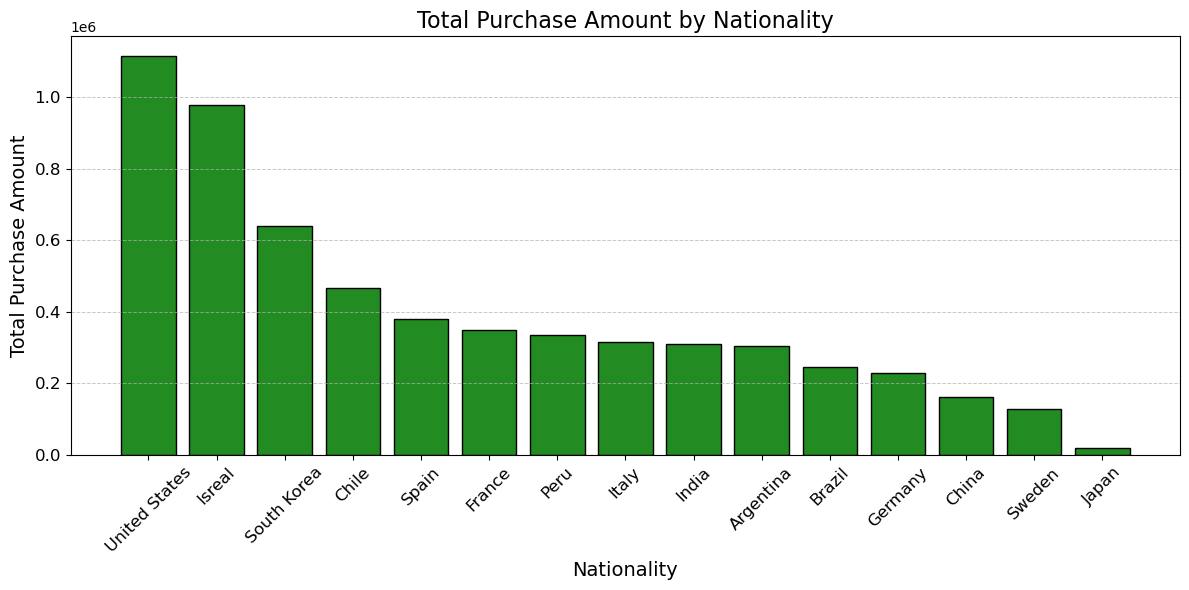

In [34]:
# 7
orders_with_customers_items.rename(columns={'nationallity': 'nationality'}, inplace=True)
nationality_total_price = orders_with_customers_items.groupby('nationality')['total_price_x'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(nationality_total_price.index, nationality_total_price.values, color='forestgreen', edgecolor='black')
plt.title('Total Purchase Amount by Nationality', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()